## Introduction & Context

This notebook provides a brief introduction to the ICIJ Offshore Leaks Database (commonly known through the Panama Papers). 
It describes the main data files, node types, and relationships, outlines the strategy for targeted extractions, and introduces the metagraph, a high-level overview of the network, to prepare the reader for detailed network analysis and visualization.

### Background

The Panama Papers (2016) are one of the largest financial leaks in history, 
revealing millions of documents exposing offshore companies, intermediaries, and individuals involved in tax evasion or hidden asset structures.

## Data structure

Each CSV file represents a different node type, and one file defines relationships between them.

### Quick preview of the files

#### Entities 

Entities represent offshore legal structures and companies registered in various jurisdictions.

In [25]:
import pandas as pd
base_path = "../Dataset/"
entities = pd.read_csv(base_path + "nodes-entities.csv")

C:\Users\Ashahi\AppData\Local\Temp\ipykernel_3288\1522325528.py:3: DtypeWarning: Columns (2,3,6,7,10,11,12,13,14,15,16,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  entities = pd.read_csv(base_path + "nodes-entities.csv")


In [26]:
entities.head(3)

,node_id,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,...,struck_off_date,dorm_date,status,service_provider,ibcRUC,country_codes,countries,sourceID,valid_until,note
0,10000001,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,...,15-FEB-2013,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,Panama Papers,The Panama Papers data is current through 2015,NaN
1,10000002,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,...,15-FEB-2014,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,Panama Papers,The Panama Papers data is current through 2015,NaN
2,10000003,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,...,15-FEB-2012,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,Panama Papers,The Panama Papers data is current through 2015,NaN


In [27]:
print(len(entities))

814344


#### Officers 

Officers are individuals related to the entities.

In [28]:
officers = pd.read_csv(base_path + "nodes-officers.csv")

officers.head(3)


,node_id,name,countries,country_codes,sourceID,valid_until,note
0,12000001,KIM SOO IN,South Korea,KOR,Panama Papers,The Panama Papers data is current through 2015,NaN
1,12000002,Tian Yuan,China,CHN,Panama Papers,The Panama Papers data is current through 2015,NaN
2,12000003,GREGORY JOHN SOLOMON,Australia,AUS,Panama Papers,The Panama Papers data is current through 2015,NaN


In [29]:
print(len(officers))

771315


#### Intermediaries 

 Intermediaries law firms, agents, or service providers.

In [30]:
intermediaries = pd.read_csv(base_path + "nodes-intermediaries.csv")
intermediaries.head(3)

,node_id,name,status,internal_id,address,countries,country_codes,sourceID,valid_until,note
0,11000001,"MICHAEL PAPAGEORGE, MR.",ACTIVE,10001,MICHAEL PAPAGEORGE; MR. 106 NICHOLSON STREET B...,South Africa,ZAF,Panama Papers,The Panama Papers data is current through 2015,NaN
1,11000002,CORFIDUCIA ANSTALT,ACTIVE,10004,NaN,Liechtenstein,LIE,Panama Papers,The Panama Papers data is current through 2015,NaN
2,11000003,"DAVID, RONALD",SUSPENDED,10014,NaN,Monaco,MCO,Panama Papers,The Panama Papers data is current through 2015,NaN


In [31]:
print(len(intermediaries))

25629


#### Addresses 

Addresses are physical locations linked to entities and intermediaries.

In [32]:
addresses  = pd.read_csv(base_path + "nodes-addresses.csv")
addresses.head(3)

,node_id,address,name,countries,country_codes,sourceID,valid_until,note
0,24000001,"ANNEX FREDERICK & SHIRLEY STS, P.O. BOX N-4805...",NaN,Bahamas,BHS,Bahamas Leaks,The Bahamas Leaks data is current through earl...,NaN
1,24000002,"SUITE E-2,UNION COURT BUILDING, P.O. BOX N-818...",NaN,Bahamas,BHS,Bahamas Leaks,The Bahamas Leaks data is current through earl...,NaN
2,24000003,"LYFORD CAY HOUSE, LYFORD CAY, P.O. BOX N-7785,...",NaN,Bahamas,BHS,Bahamas Leaks,The Bahamas Leaks data is current through earl...,NaN


In [33]:
print(len(addresses))

402246


#### Others 

Others are additional registry data (e.g., Paradise Papers).

In [34]:
others  = pd.read_csv(base_path + "nodes-others.csv")
others.head(3)


,node_id,name,type,incorporation_date,struck_off_date,closed_date,jurisdiction,jurisdiction_description,countries,country_codes,sourceID,valid_until,note
0,85004929,ANTAM ENTERPRISES N.V.,LIMITED LIABILITY COMPANY,18-MAY-1983,NaN,28-NOV-2012,AW,Aruba,NaN,NaN,Paradise Papers - Aruba corporate registry,Aruba corporate registry data is current throu...,Closed date stands for Cancelled date.
1,85008443,DEVIATION N.V.,LIMITED LIABILITY COMPANY,28-JUN-1989,31-DEC-2002,NaN,AW,Aruba,NaN,NaN,Paradise Papers - Aruba corporate registry,Aruba corporate registry data is current throu...,NaN
2,85008517,ARIAZI N.V.,LIMITED LIABILITY COMPANY,19-JUL-1989,NaN,19-MAY-2004,AW,Aruba,NaN,NaN,Paradise Papers - Aruba corporate registry,Aruba corporate registry data is current throu...,Closed date stands for Cancelled date.


In [35]:
print(len(others))

2989


#### Relationships

In [36]:
relationships  = pd.read_csv(base_path + "relationships.csv")

C:\Users\Ashahi\AppData\Local\Temp\ipykernel_3288\45963469.py:1: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  relationships  = pd.read_csv(base_path + "relationships.csv")


In [37]:
print(len(relationships))

3339267


In [38]:
rel_types = relationships["rel_type"].value_counts().reset_index()
rel_types.columns = ["Relation type", "Count"]
display(rel_types.head(10))

,Relation type,Count
0,officer_of,1720357
1,registered_address,832721
2,intermediary_of,598546
3,same_name_as,104170
4,similar,46761
5,same_company_as,15523
6,connected_to,12145
7,same_as,4272
8,same_id_as,3120
9,underlying,1308


The most common relationship types include:

- officer_of connects a person to a company  
- registered_address links an entity to an address  
- intermediary_of links a service provider to an offshore company

## NEXT STEPS

### Metagraph

The metagraph below summarizes the main node types and relationships in the Panama Papers network.

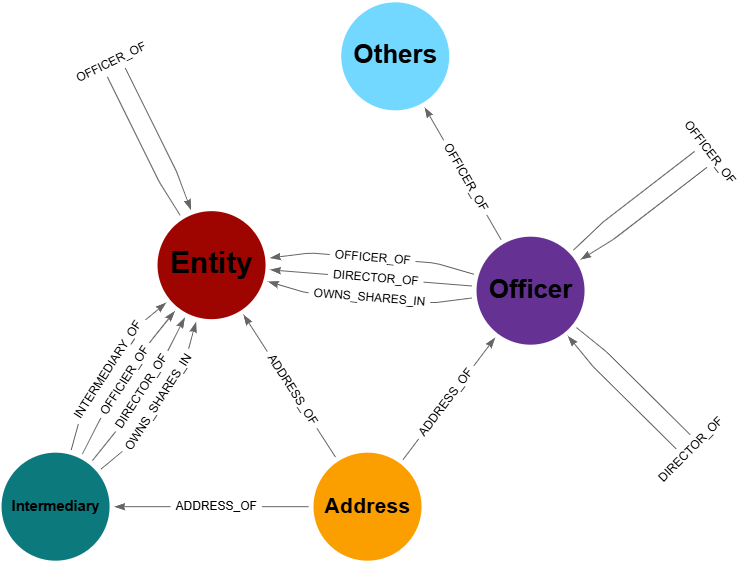

### Data Volume & Extraction Strategy

The Panama Papers network contains millions of nodes and relationships, making full-scale analysis impractical.
Instead of random sampling, we later will perform targeted extractions around pivotal and highly connected nodes to focus on the most meaningful structural patterns.